In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import os

In [ ]:
# Input directory
input_base_dir = 'BCS'

# Categories based on your folder structure
categories = ['belly pain', 'burping', 'cold_hot', 'discomfort', 'hungry', 'laugh', 'noise', 'silence', 'tired']

# Output base directory
output_base_dir = 'BCS/spectrograms'

# Create output directories for each category
for category in categories:
    input_path = os.path.join(input_base_dir, category)
    output_path = os.path.join(output_base_dir, category)
    
    # Create output directory if it doesn't exist
    os.makedirs(output_path, exist_ok=True)
    
    # Check if input directory exists
    if not os.path.exists(input_path):
        print(f"Warning: Input directory '{input_path}' does not exist")
        continue
    
    # Process all audio files in the category
    audio_files = [f for f in os.listdir(input_path) if f.endswith(('.wav', '.mp3', '.flac', '.ogg'))]
    
    if not audio_files:
        print(f"No audio files found in '{input_path}'")
        continue
    
    print(f"Processing {len(audio_files)} files from '{category}'...")
    
    for file in audio_files:
        filepath = os.path.join(input_path, file)
        
        try:
            # Load audio file
            y, sr = librosa.load(filepath, sr=22050)
            
            # Create Mel-spectrogram
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
            S_db = librosa.power_to_db(S, ref=np.max)
            
            # Plot and save spectrogram
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
            plt.axis('off')
            
            # Save with the same name but as PNG
            output_filename = os.path.splitext(file)[0] + '.png'
            save_path = os.path.join(output_path, output_filename)
            plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
            plt.close()
            
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")
    
    print(f"Completed processing '{category}'")

print("\nAll categories processed!")

Processing 124 files from 'belly pain'...
Completed processing 'belly pain'
Processing 108 files from 'burping'...
Completed processing 'burping'
Processing 108 files from 'cold_hot'...
Completed processing 'cold_hot'
Processing 135 files from 'discomfort'...
Completed processing 'discomfort'
Processing 382 files from 'hungry'...
Completed processing 'hungry'
Processing 108 files from 'laugh'...
Completed processing 'laugh'
Processing 108 files from 'noise'...
Completed processing 'noise'
Processing 108 files from 'silence'...
Completed processing 'silence'
Processing 132 files from 'tired'...
Completed processing 'tired'

All categories processed!


In [2]:
#load data from spectrograms
import cv2
from sklearn.model_selection import train_test_split

# Base directory for spectrograms
spectrograms_dir = 'BCS/spectrograms'

# Categories (folder names will be the labels)
categories = ['belly pain', 'burping', 'cold_hot', 'discomfort', 'hungry', 'laugh', 'noise', 'silence', 'tired']

# Lists to store images and labels
X = []  # Images
y = []  # Labels

print("Loading spectrogram images...")

for idx, category in enumerate(categories):
    category_path = os.path.join(spectrograms_dir, category)
    
    if not os.path.exists(category_path):
        print(f"Warning: Directory '{category_path}' does not exist")
        continue
    
    # Get all PNG files
    image_files = [f for f in os.listdir(category_path) if f.endswith('.png')]
    
    print(f"Loading {len(image_files)} images from '{category}'...")
    
    for image_file in image_files:
        image_path = os.path.join(category_path, image_file)
        
        try:
            # Read image
            img = cv2.imread(image_path)
            
            if img is not None:
                # Resize image to consistent size (e.g., 224x224)
                img_resized = cv2.resize(img, (224, 224))
                
                X.append(img_resized)
                y.append(idx)  # Use category index as label
            else:
                print(f"Warning: Could not load {image_path}")
                
        except Exception as e:
            print(f"Error loading {image_file}: {str(e)}")




Loading spectrogram images...
Loading 124 images from 'belly pain'...
Loading 108 images from 'burping'...
Loading 108 images from 'cold_hot'...
Loading 135 images from 'discomfort'...
Loading 382 images from 'hungry'...
Loading 108 images from 'laugh'...
Loading 108 images from 'noise'...
Loading 108 images from 'silence'...
Loading 132 images from 'tired'...


In [3]:

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print(f"\nDataset loaded successfully!")
print(f"Total samples: {len(X)}")
print(f"Image shape: {X[0].shape if len(X) > 0 else 'N/A'}")
print(f"Number of classes: {len(categories)}")
print(f"\nClass distribution:")
for idx, category in enumerate(categories):
    count = np.sum(y == idx)
    print(f"  {category}: {count} samples")

# Normalize pixel values to [0, 1]
X = X.astype('float32') / 255.0

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")


Dataset loaded successfully!
Total samples: 1313
Image shape: (224, 224, 3)
Number of classes: 9

Class distribution:
  belly pain: 124 samples
  burping: 108 samples
  cold_hot: 108 samples
  discomfort: 135 samples
  hungry: 382 samples
  laugh: 108 samples
  noise: 108 samples
  silence: 108 samples
  tired: 132 samples

Training set: 1050 samples
Testing set: 263 samples


Preparing data for SVM...
Flattened training data shape: (1050, 150528)
Flattened test data shape: (263, 150528)

Training SVM model...
Model training completed!

Evaluating model on test set...

Test Accuracy: 0.5665 (56.65%)

Classification Report:
              precision    recall  f1-score   support

  belly pain       0.73      0.32      0.44        25
     burping       0.88      0.32      0.47        22
    cold_hot       0.00      0.00      0.00        21
  discomfort       0.00      0.00      0.00        27
      hungry       0.42      1.00      0.59        76
       laugh       0.91      0.95      0.93        22
       noise       1.00      0.68      0.81        22
     silence       0.96      1.00      0.98        22
       tired       0.00      0.00      0.00        26

    accuracy                           0.57       263
   macro avg       0.54      0.47      0.47       263
weighted avg       0.50      0.57      0.48       263


Confusion Matrix:
[[ 8  0  0  0 17  0  0  0

C:\Users\harik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\harik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\harik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_clas

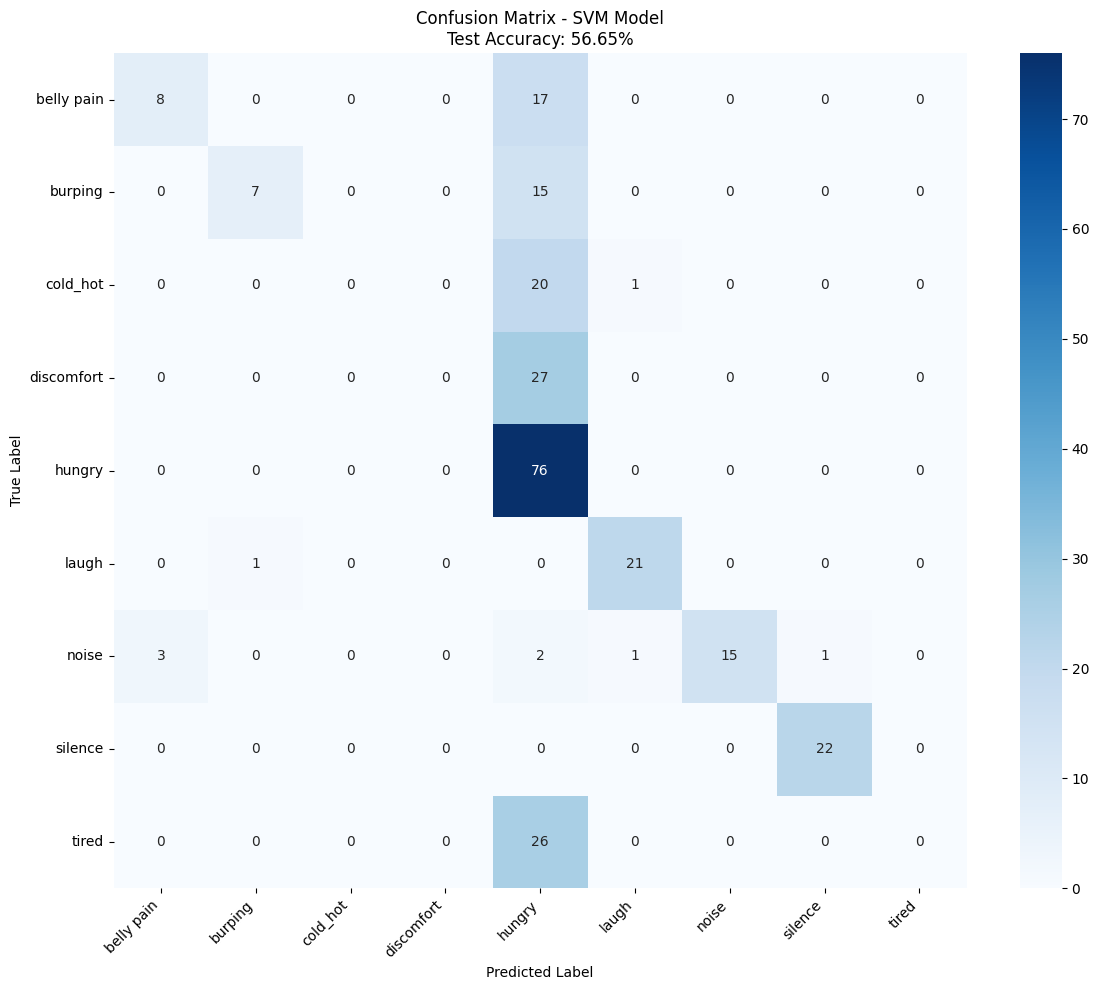


Per-class Accuracy:
  belly pain: 0.3200 (32.00%)
  burping: 0.3182 (31.82%)
  cold_hot: 0.0000 (0.00%)
  discomfort: 0.0000 (0.00%)
  hungry: 1.0000 (100.00%)
  laugh: 0.9545 (95.45%)
  noise: 0.6818 (68.18%)
  silence: 1.0000 (100.00%)
  tired: 0.0000 (0.00%)


In [4]:
# Build SVM Model
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

print("Preparing data for SVM...")

# Flatten images for SVM (SVM needs 1D feature vectors)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print(f"Flattened training data shape: {X_train_flat.shape}")
print(f"Flattened test data shape: {X_test_flat.shape}")

# Train simple SVM without GridSearchCV
print("\nTraining SVM model...")
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(X_train_flat, y_train)

print("Model training completed!")

# Make predictions
print("\nEvaluating model on test set...")
y_pred = svm.predict(X_test_flat)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=categories))

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=categories, yticklabels=categories)
plt.title(f'Confusion Matrix - SVM Model\nTest Accuracy: {test_accuracy:.2%}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Per-class accuracy
print("\nPer-class Accuracy:")
for idx, category in enumerate(categories):
    class_mask = y_test == idx
    if np.sum(class_mask) > 0:
        class_accuracy = accuracy_score(y_test[class_mask], y_pred[class_mask])
        print(f"  {category}: {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")